**IMPORTING LIBRARIES**

In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

**LOADING DATASET**

In [5]:
data = load_breast_cancer()
df = pd.DataFrame(data.data,columns=data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
type(data.feature_names)

numpy.ndarray

**NORMALIZING THE DATASET**

In [16]:
from sklearn.preprocessing import StandardScaler

In [20]:
breast_cancer_scaler = StandardScaler()
breast_cancer_scaler.fit(df)

breast_cancer_scaled = breast_cancer_scaler.transform(df)
breast_cancer_scaled_df = pd.DataFrame(data = breast_cancer_scaled,columns=data.feature_names)

breast_cancer_scaled_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


**PERFORMING PCA**

In [21]:
from sklearn.decomposition import PCA

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 232 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 232 from PyObject


In [24]:
pca = PCA(n_components=3)
pca.fit(breast_cancer_scaled)

breast_cancer_dataset_pca = pca.transform(breast_cancer_scaled)
breast_cancer_dataset_pca_df = pd.DataFrame(breast_cancer_dataset_pca,columns=['PC1','PC2','PC3'])

breast_cancer_dataset_pca_df.head()

,PC1,PC2,PC3
0,9.192837,1.948583,-1.123165
1,2.387802,-3.768172,-0.529290
2,5.733896,-1.075174,-0.551745
3,7.122953,10.275589,-3.232786
4,3.935302,-1.948072,1.389765


**BY ADDING TARGET, WE HAVE SUCCESSFULLY REDUCED THE NUMBER OF FEATURES FROM 30 TO 3**

In [25]:
breast_cancer_dataset_pca_df['Target'] = data.target
breast_cancer_dataset_pca_df

,PC1,PC2,PC3,Target
0,9.192837,1.948583,-1.123165,0
1,2.387802,-3.768172,-0.529290,0
2,5.733896,-1.075174,-0.551745,0
3,7.122953,10.275589,-3.232786,0
4,3.935302,-1.948072,1.389765,0
...,...,...,...,...
564,6.439315,-3.576818,2.459488,0
565,3.793382,-3.584048,2.088477,0
566,1.256179,-1.902297,0.562731,0
567,10.374794,1.672010,-1.877034,0


**PERFROMING LOGISTIC REGRESSION ON REDUCED DATASET AND ORIGINAL DATASET FOR COMPARISION**

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

ORIGINAL DATASET

In [34]:
model = LogisticRegression()
X_train,X_test,y_train,y_test = train_test_split(df,data.target)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print("Original Dataset Accuracy: ",accuracy_score(y_test,y_pred))

Original Dataset Accuracy:  0.972027972027972


PCA DATASET

In [35]:
model = LogisticRegression()
X_train,X_test,y_train,y_test = train_test_split(breast_cancer_dataset_pca_df,data.target)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print("PCA Dataset Accuracy: ",accuracy_score(y_test,y_pred))

PCA Dataset Accuracy:  1.0


**VISUALISATING PCA DATASET**

In [41]:
import seaborn as sns
import matplotlib as plt
sns.set()

bcdp=breast_cancer_dataset_pca_df
bcdp

,PC1,PC2,PC3,Target
0,9.192837,1.948583,-1.123165,0
1,2.387802,-3.768172,-0.529290,0
2,5.733896,-1.075174,-0.551745,0
3,7.122953,10.275589,-3.232786,0
4,3.935302,-1.948072,1.389765,0
...,...,...,...,...
564,6.439315,-3.576818,2.459488,0
565,3.793382,-3.584048,2.088477,0
566,1.256179,-1.902297,0.562731,0
567,10.374794,1.672010,-1.877034,0


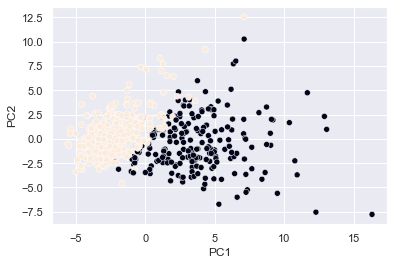

In [46]:
sns.scatterplot(bcdp['PC1'],bcdp['PC2'],c=bcdp['Target']);

#### Conclusion
-----------------------
With this dataset, PCA dataset gave us more accuracy than original dataset and also helped us reduce time, thus its a win-win situation.....!